# 훈련 추론, 데이터 검증

In [ ]:
import numpy as np
import cv2
import torch
import pandas as pd
import re
import pickle as pkl
import json
import glob
import shutil
import os
import json
import pathlib as pl
from typing import List, Tuple, Dict, Union, Optional
from tqdm import trange, tqdm
from glob import glob
from collections import Counter
from sklearn.model_selection import train_test_split

from modules.preprocessing import V2XPreprocessing
from modules.v2x import V2XData,V2XDataLabeled
from modules.metrics import *
from tsai.all import *
from tqdm import tqdm
from modules.RunTSAI import RunTSAI
from sklearn.utils import shuffle

## 8월

In [ ]:
X8 = np.load("pickles/8월/X_8.npy")
y8 = np.load("pickles/8월/y_8.npy")
y8_turn = y8[:, 0]
y8_speed = y8[:, 2]
y8_hazard = y8[:, 3]

config = AttrDict(
    batch_tfms = TSStandardize(),
    architecture = LSTM_FCNPlus, # LSTM, LSTM_FCNPlus, MLSTM_Plus
    n_epochs = 10,
)

RunTSAI.target_label_counter(y8)
split_all = get_splits(y8, shuffle=True, valid_size=0.2, test_size=0.2, random_state=42)

Counter({'False': 876495, 'Right': 26666, 'Left': 25099, 'Reverse': 1740})
Counter({'False': 930000})
Counter({'False': 929248, 'Hbrk': 553, 'Acc': 199})
Counter({'False': 926813, 'True': 3187})


[Counter({'False': 876495, 'Left': 25099, 'Right': 26666, 'Reverse': 1740}),
 Counter({'False': 930000}),
 Counter({'False': 929248, 'Hbrk': 553, 'Acc': 199}),
 Counter({'False': 926813, 'True': 3187})]

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.077094,0.081910,0.974661,0.660364,0.738133,0.610686,02:46
1,0.056937,0.052153,0.981941,0.763708,0.806294,0.732349,03:16
2,0.039679,0.040248,0.985414,0.822215,0.852470,0.802746,03:06
3,0.035718,0.033430,0.988543,0.862264,0.878900,0.846970,02:50
4,0.037255,0.032410,0.988726,0.856167,0.899145,0.826936,03:00
5,0.029597,0.028890,0.989511,0.886633,0.888289,0.885190,03:15
6,0.025875,0.025280,0.990962,0.902581,0.904688,0.901033,03:38
7,0.024557,0.022927,0.992220,0.912326,0.918245,0.906561,03:17
8,0.015796,0.021922,0.992575,0.912265,0.928834,0.897103,03:16
9,0.019382,0.021737,0.992640,0.912812,0.928099,0.898657,03:15


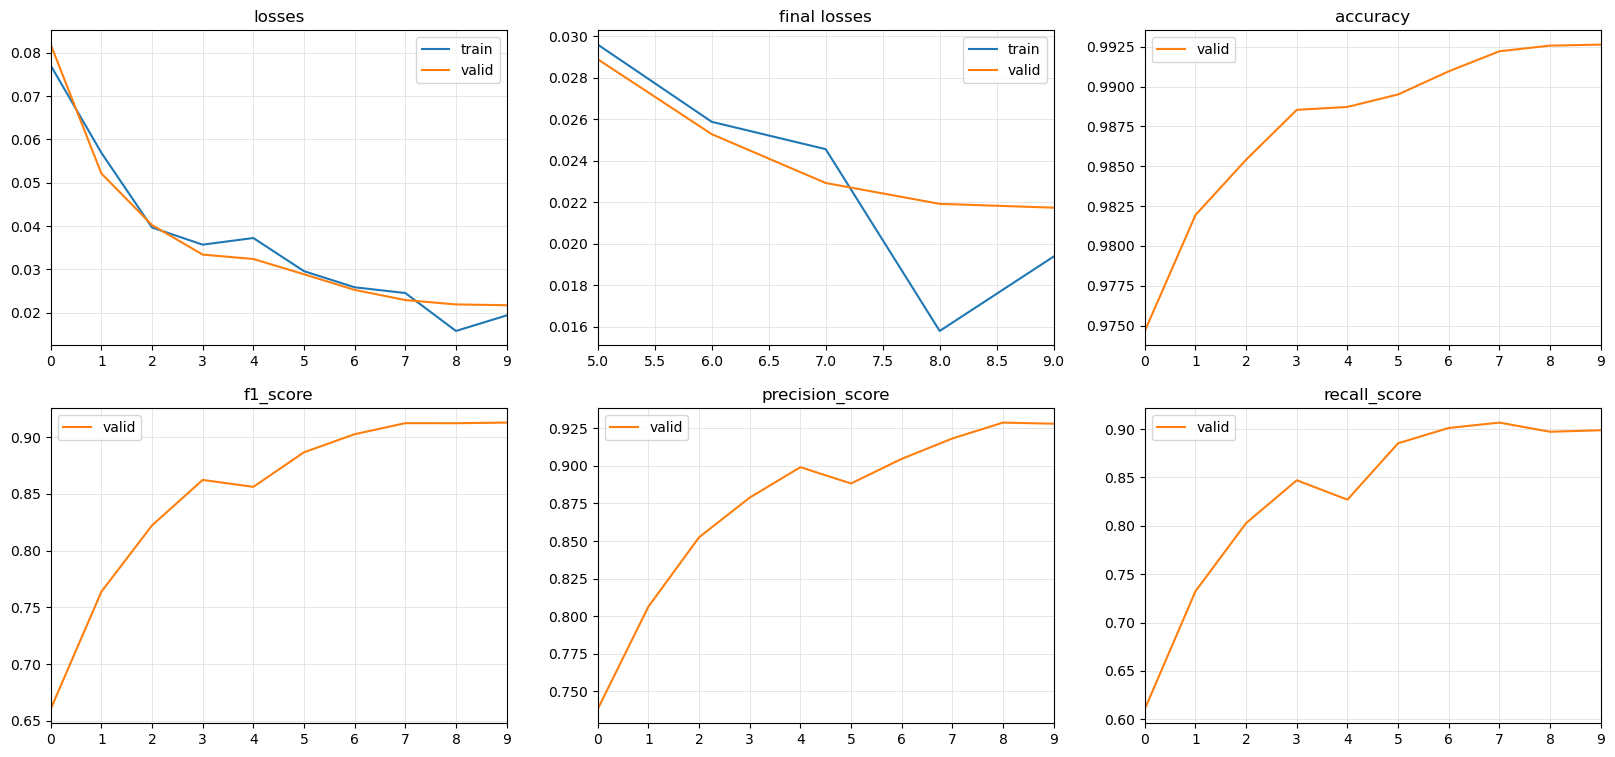

In [ ]:
learn8_turn = RunTSAI.multiclass_classification(X8, y8_turn, split_all, config, save_path = "models/V2X_8/turn")

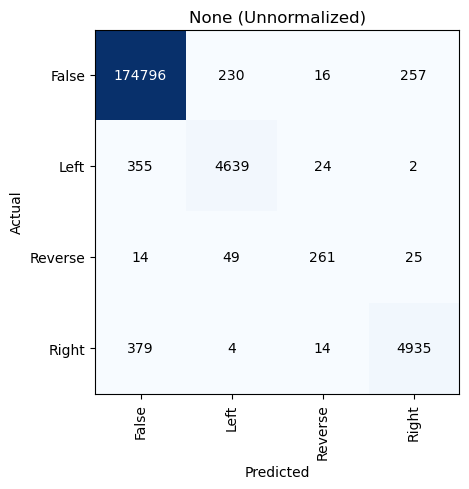

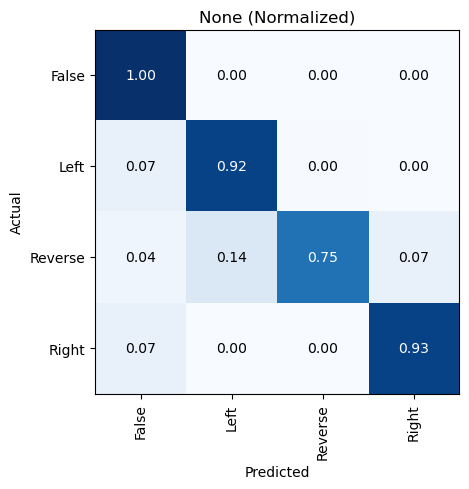

In [ ]:
RunTSAI.plot_confusion_matrix(learn8_turn)

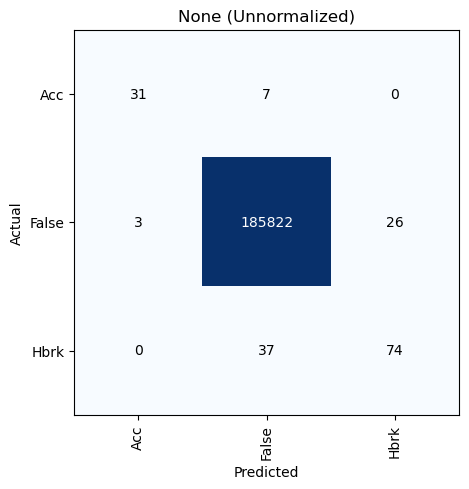

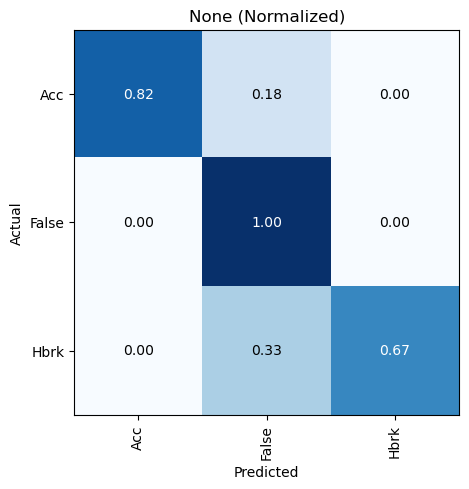

In [ ]:
learn8_speed = RunTSAI.multiclass_classification(X8, y8_speed, split_all, config, save_path = "models/V2X_8/speed")
RunTSAI.plot_confusion_matrix(learn8_speed)

## 9월

Counter({'Fals': 1274127, 'Righ': 38008, 'Left': 35376, 'Reve': 2489})
Counter({'Fals': 1350000})
Counter({'Fals': 1348923, 'Hbrk': 796, 'Acc': 281})
Counter({'Fals': 1345730, 'True': 4270})


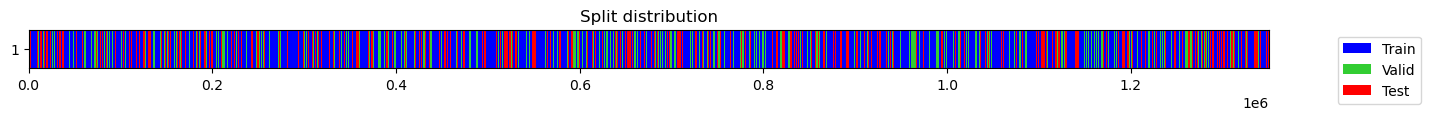

In [ ]:
X9 = np.load("pickles/9월/X_9.npy")
y9 = np.load("pickles/9월/y_9.npy")
y9_turn = y9[:, 0]
y9_speed = y9[:, 2]
y9_hazard = y9[:, 3]

config = AttrDict(
    batch_tfms = TSStandardize(),
    architecture = LSTM_FCNPlus, # LSTM, LSTM_FCNPlus, MLSTM_Plus
    n_epochs = 10,
)

RunTSAI.target_label_counter(y9)
split_all9 = get_splits(y9_turn, shuffle=True, valid_size=0.2, test_size=0.2, random_state=42)
split_all9

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.076881,0.066641,0.978496,0.716634,0.807770,0.661097,03:49
1,0.051158,0.049422,0.984126,0.780034,0.843150,0.742461,03:49
2,0.043707,0.035386,0.988163,0.853139,0.865899,0.840971,04:30
3,0.029938,0.033865,0.988770,0.874278,0.919606,0.838692,04:33
4,0.028248,0.034657,0.988444,0.870457,0.850057,0.894359,04:43
5,0.028601,0.029343,0.990281,0.892619,0.911569,0.875708,04:42
6,0.022755,0.026521,0.991267,0.894768,0.887927,0.905559,05:27
7,0.022278,0.025042,0.992148,0.915339,0.922187,0.908682,05:40
8,0.018532,0.023296,0.993119,0.918110,0.944852,0.894914,05:39
9,0.022146,0.023076,0.993367,0.929167,0.936873,0.921666,04:05


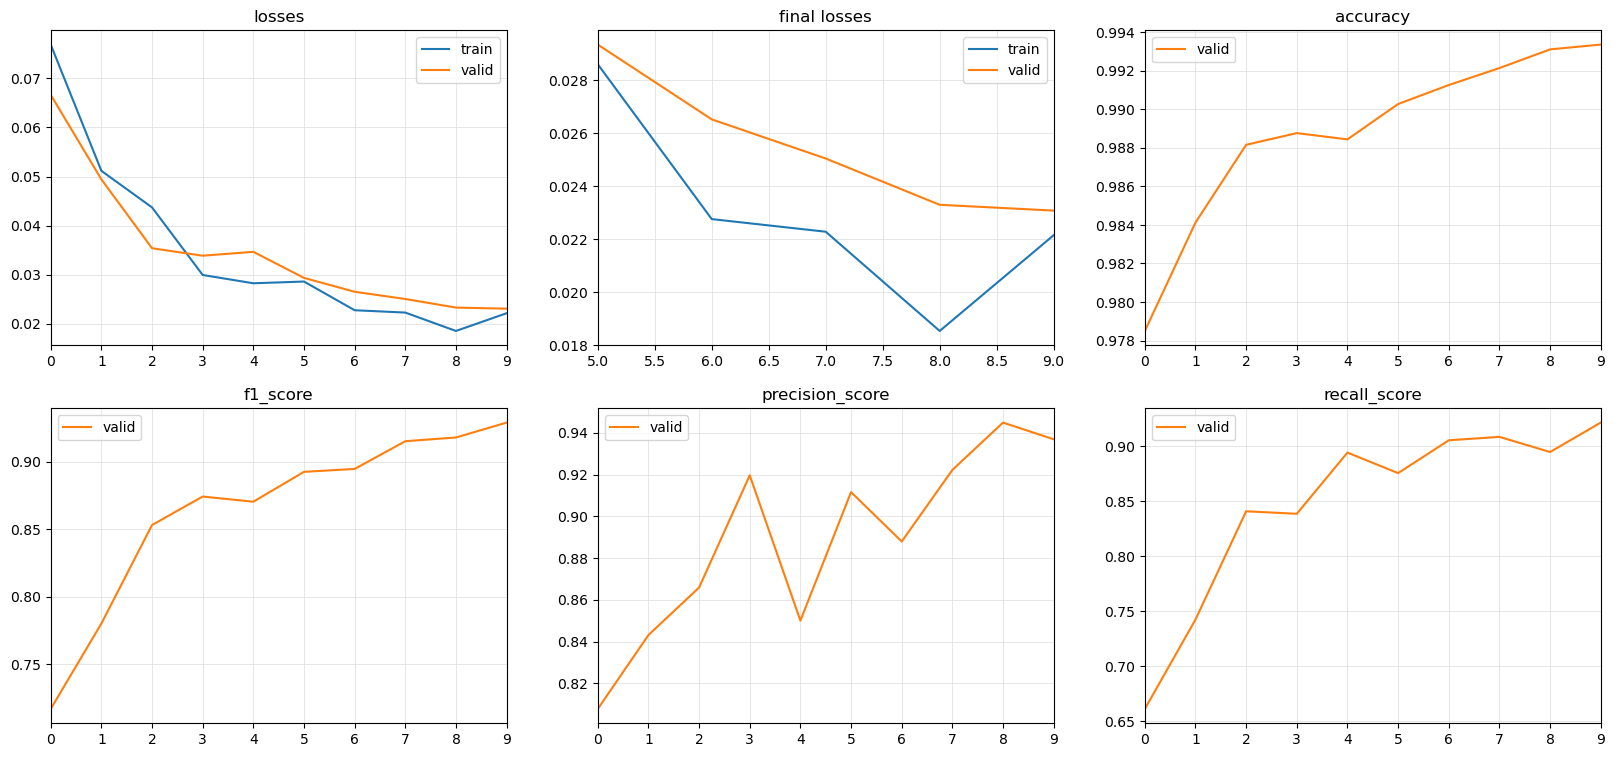

In [ ]:
learn9_turn = RunTSAI.multiclass_classification(X9, y9_turn, split_all9, config, save_path = "models/V2X_9/turn")

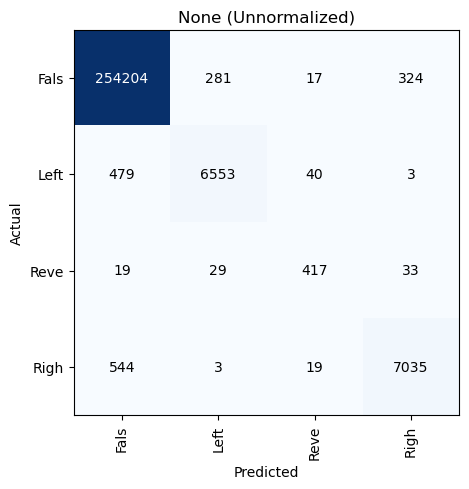

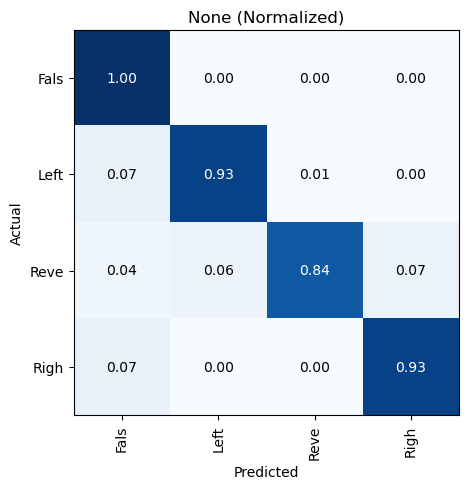

In [ ]:
RunTSAI.plot_confusion_matrix(learn9_turn)

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.003458,0.024387,0.999367,0.712441,0.752877,0.748533,03:59
1,0.000974,0.006017,0.999322,0.537768,0.734132,0.472236,03:20
2,0.003079,0.004882,0.999030,0.736331,0.716200,0.802531,03:06
3,0.001728,0.003285,0.999463,0.733070,0.909969,0.677807,03:15
4,0.001189,0.003144,0.999485,0.747788,0.936018,0.655949,03:14
5,0.002084,0.002623,0.999563,0.790774,0.950342,0.697276,03:04
6,0.001832,0.002237,0.999604,0.830111,0.874547,0.792861,03:17
7,0.000863,0.002058,0.999552,0.826515,0.849132,0.810011,03:20
8,0.001132,0.001937,0.999596,0.849795,0.853885,0.845772,03:28
9,0.000749,0.001855,0.999656,0.853678,0.888765,0.823301,03:17


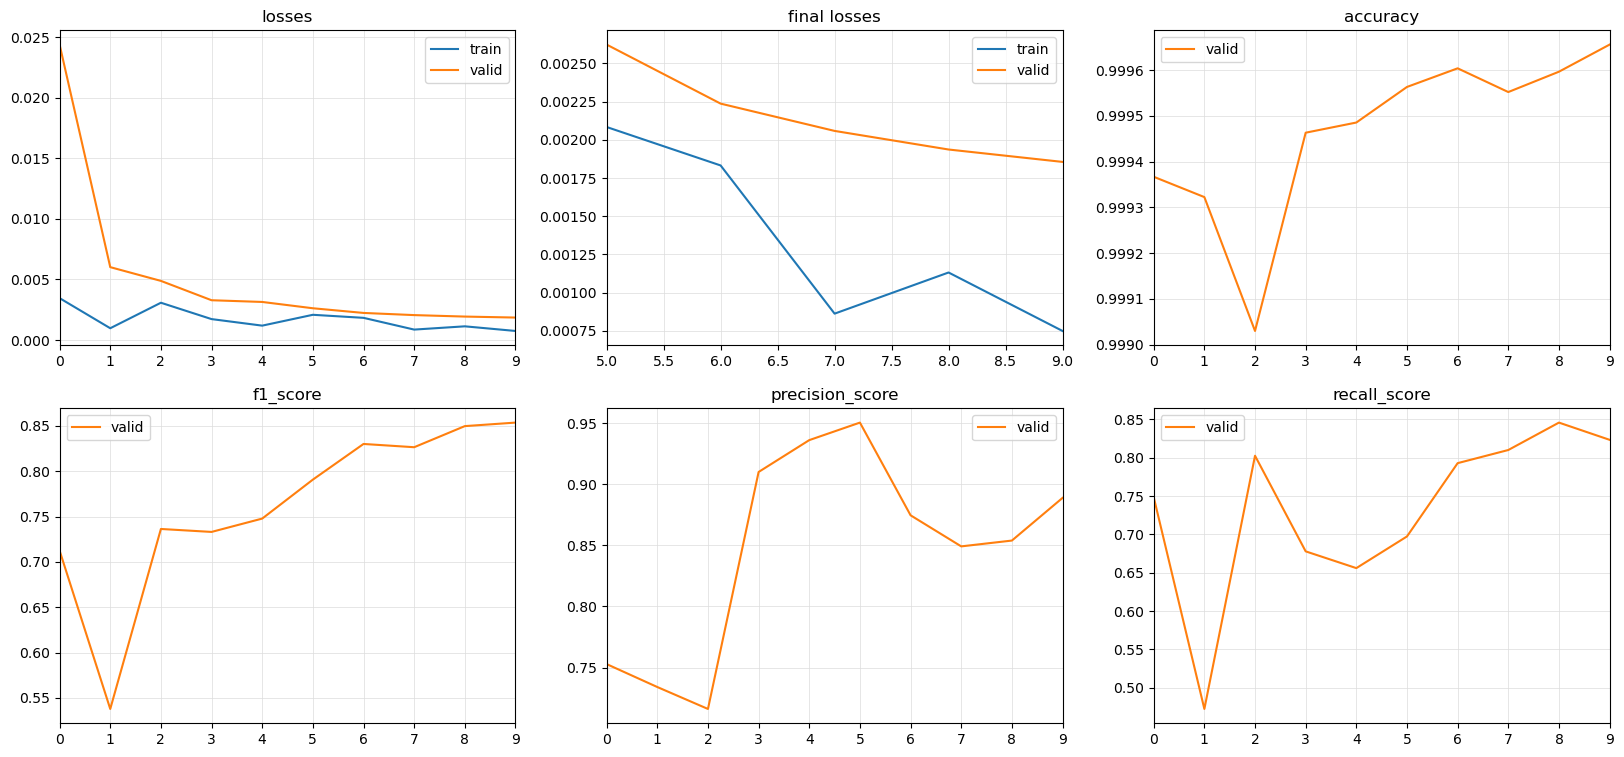

In [ ]:
learn9_speed = RunTSAI.multiclass_classification(X9, y9_speed, split_all9, config, save_path = "models/V2X_9/speed")

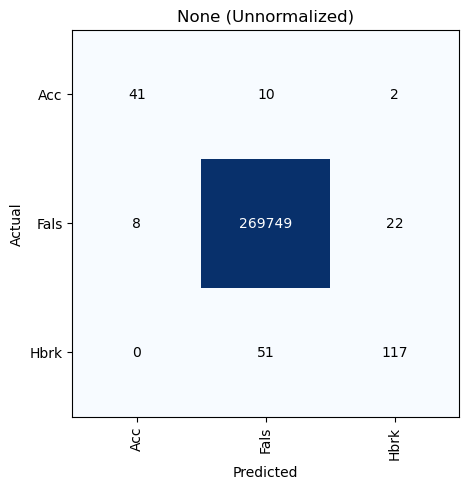

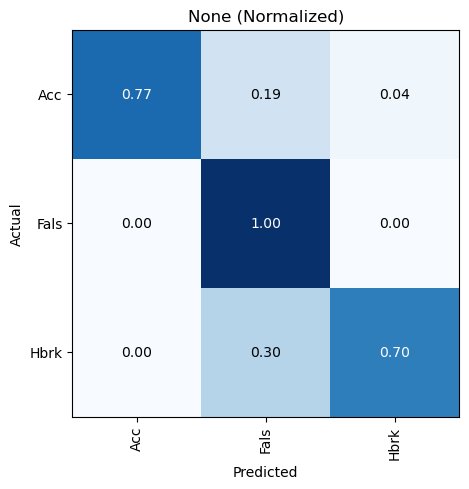

In [ ]:
RunTSAI.plot_confusion_matrix(learn9_speed)

## 10월

Counter({'Fals': 1273760, 'Righ': 38146, 'Left': 35737, 'Reve': 2357})
Counter({'Fals': 1350000})
Counter({'Fals': 1348931, 'Hbrk': 800, 'Acc': 269})
Counter({'Fals': 1345491, 'True': 4509})


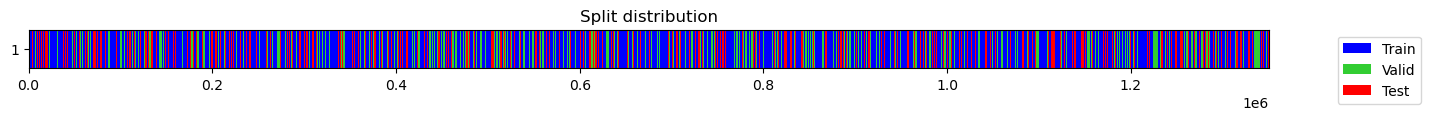

In [ ]:
config = AttrDict(
    batch_tfms = TSStandardize(),
    architecture = LSTM_FCNPlus, # LSTM, LSTM_FCNPlus, MLSTM_Plus
    n_epochs = 10,
)

X = np.load("pickles/10월/X_10.npy")
y = np.load("pickles/10월/y_10.npy")
RunTSAI.target_label_counter(y)
split_all = get_splits(y[:, 0], shuffle=True, valid_size=0.2, test_size=0.2, random_state=42)
y10_turn = y[:, 0]
y10_speed = y[:, 2]
y10_hazard = y[:, 3]

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.064353,0.067516,0.978581,0.695359,0.849958,0.644436,03:57
1,0.046830,0.045954,0.983230,0.749573,0.869811,0.696771,03:58
2,0.036861,0.033107,0.988500,0.850282,0.896988,0.812749,04:02
3,0.034751,0.033266,0.988333,0.869462,0.896088,0.851573,04:07
4,0.028072,0.032589,0.988407,0.875617,0.864499,0.887408,04:12
5,0.026214,0.024293,0.991467,0.903110,0.902456,0.904315,04:31
6,0.022637,0.024375,0.991015,0.908209,0.899153,0.918407,03:45
7,0.019396,0.022229,0.992319,0.914828,0.933176,0.897637,03:41
8,0.018166,0.020366,0.993033,0.924401,0.932349,0.916677,04:20
9,0.020008,0.019904,0.993174,0.927219,0.933180,0.921377,04:35


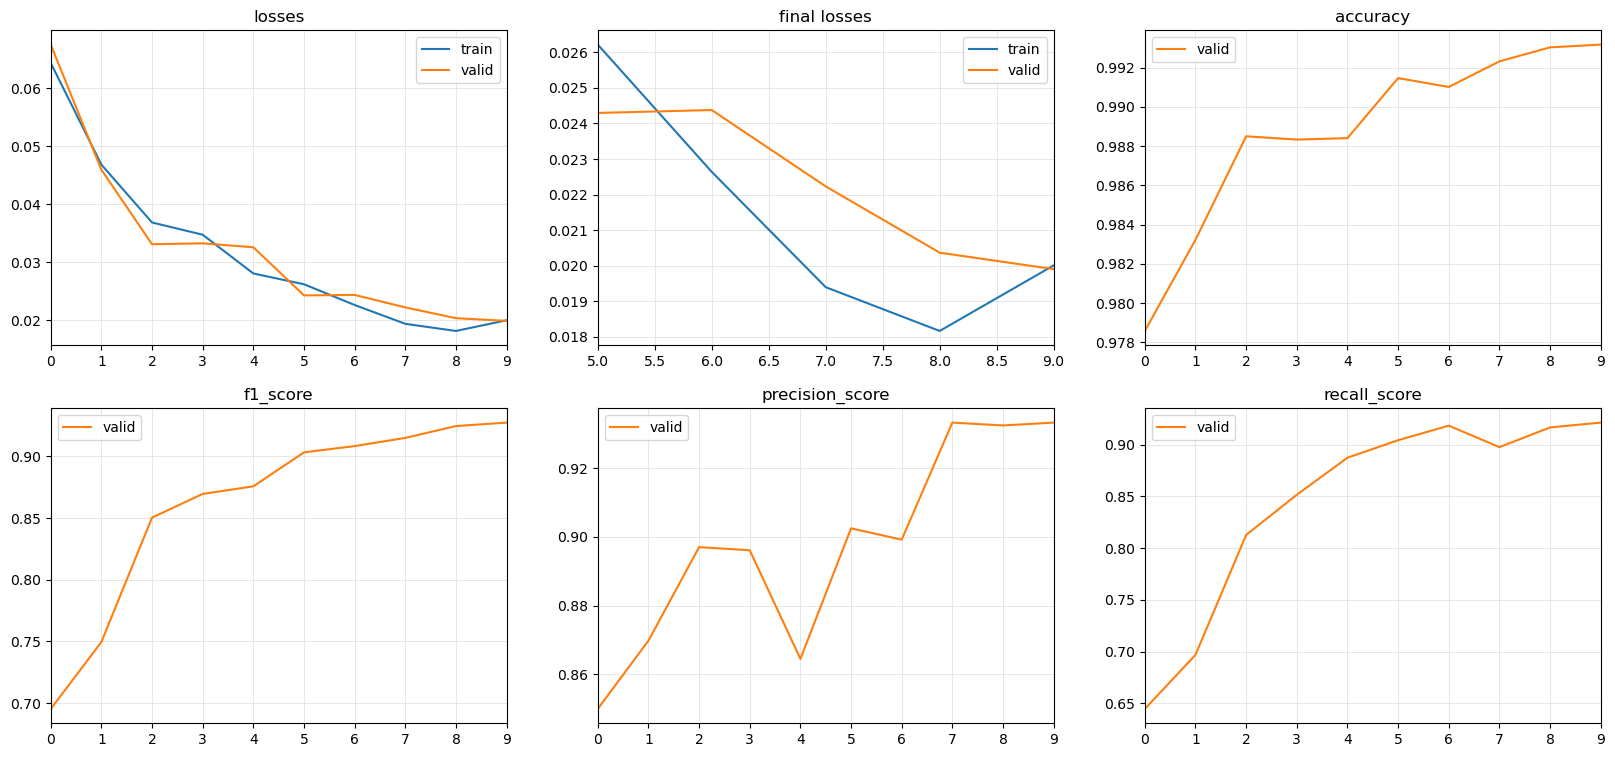

In [ ]:
learn10_turn = RunTSAI.multiclass_classification(X, y10_turn, split_all, config, save_path = "models/V2X_10/turn")

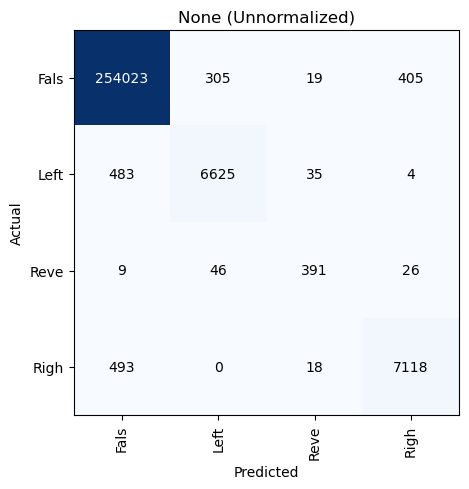

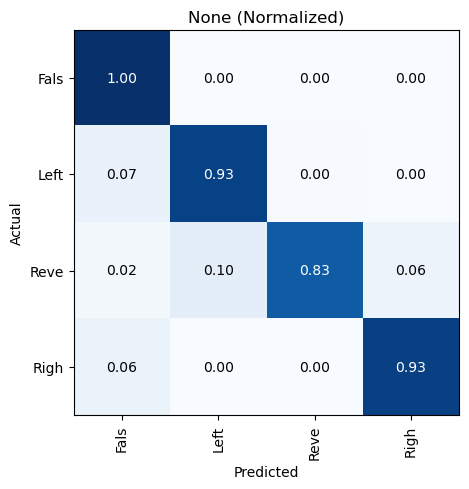

In [ ]:
RunTSAI.plot_confusion_matrix(learn10_turn)

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.001155,0.025734,0.999311,0.615254,0.812326,0.534269,04:50
1,0.007576,0.018302,0.999370,0.686969,0.766050,0.634594,04:33
2,0.008318,0.020068,0.999407,0.733806,0.713995,0.756155,04:04
3,0.001571,0.021389,0.999437,0.731306,0.800744,0.684919,03:43
4,0.003348,0.009311,0.999530,0.763812,0.927576,0.671319,03:27
5,0.002356,0.010065,0.999552,0.788596,0.838032,0.748914,03:20
6,0.001569,0.012102,0.999563,0.796085,0.878860,0.736486,03:26
7,0.001050,0.001757,0.999630,0.821411,0.948116,0.738031,03:19
8,0.000541,0.001655,0.999652,0.842522,0.924519,0.781076,03:24
9,0.004101,0.001672,0.999641,0.834928,0.918004,0.772584,03:50


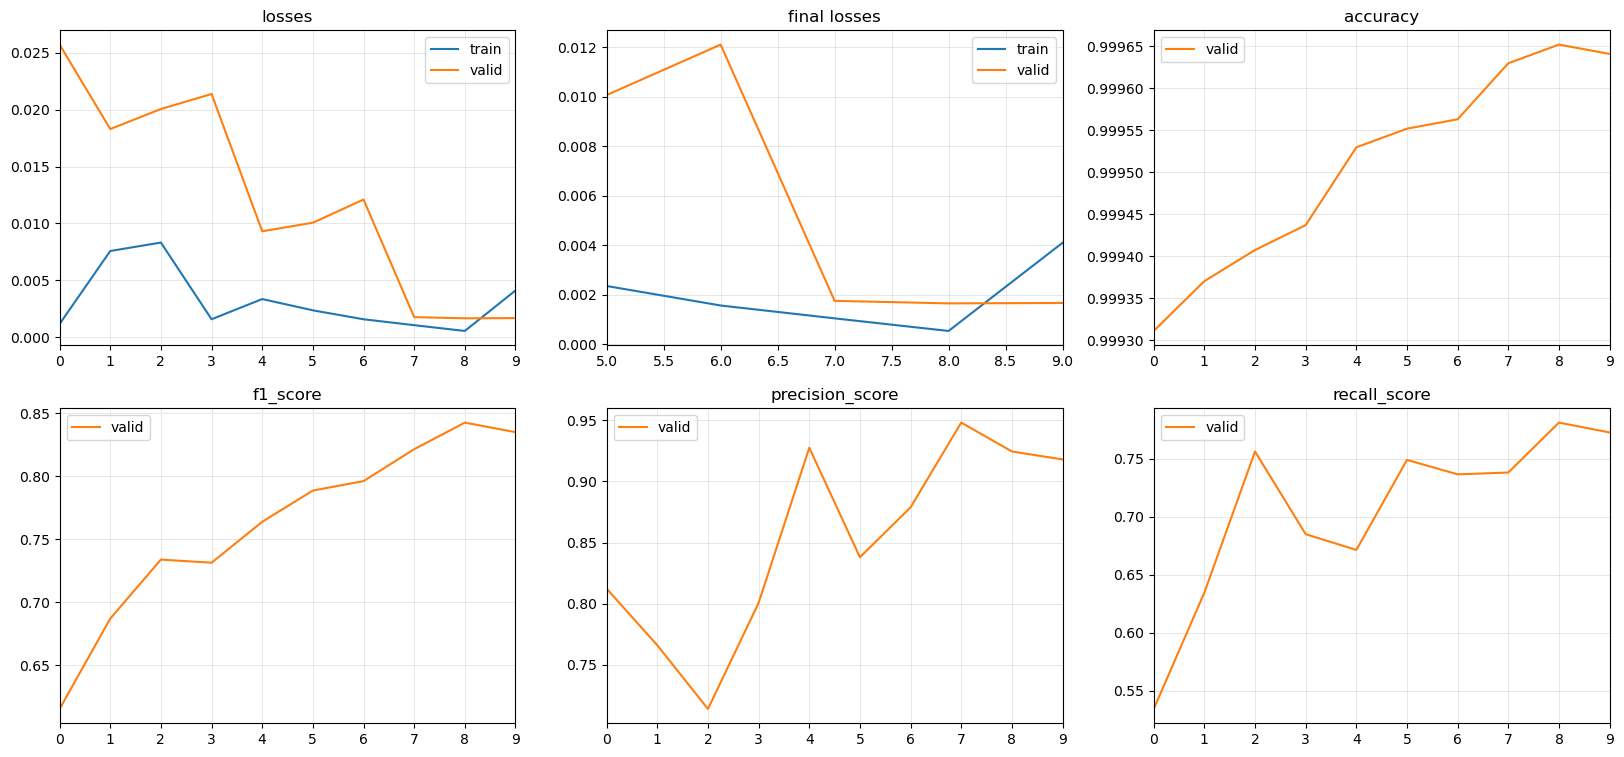

In [ ]:
learn10_speed = RunTSAI.multiclass_classification(X, y10_speed, split_all, config, save_path = "models/V2X_10/speed")

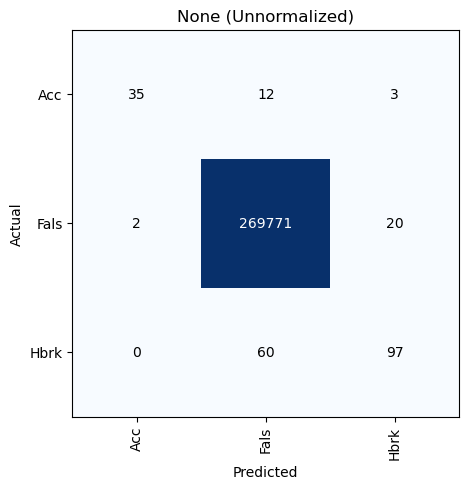

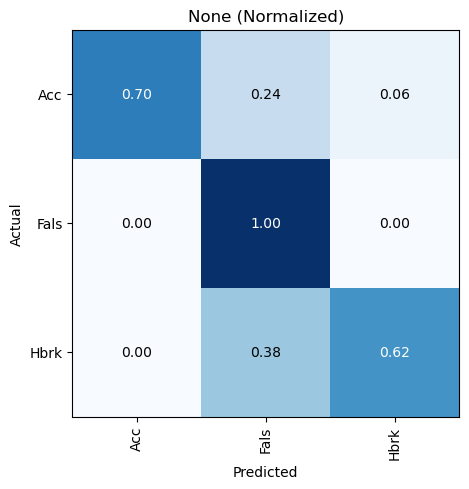

In [ ]:
RunTSAI.plot_confusion_matrix(learn10_speed)

## 11월

Counter({'Fals': 425294, 'Righ': 12424, 'Left': 11491, 'Reve': 791})
Counter({'Fals': 450000})
Counter({'Fals': 449574, 'Hbrk': 300, 'Acc': 126})
Counter({'Fals': 448377, 'True': 1623})


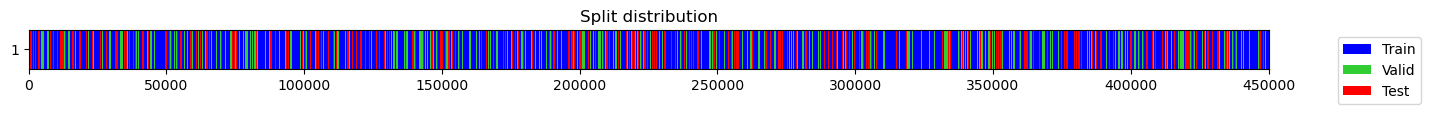

In [ ]:
X = np.load("pickles/11월/X_11.npy")
y = np.load("pickles/11월/y_11.npy")
RunTSAI.target_label_counter(y)
split_all = get_splits(y[:, 0], shuffle=True, valid_size=0.2, test_size=0.2, random_state=42)
y11_turn = y[:, 0]
y11_speed = y[:, 2]
y11_hazard = y[:, 3]


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.137592,0.131769,0.959400,0.490129,0.628173,0.432156,01:28
1,0.066827,0.070437,0.977311,0.688632,0.784204,0.638256,01:25
2,0.064512,0.056680,0.979500,0.726892,0.761926,0.697971,01:26
3,0.048018,0.044148,0.984667,0.803483,0.846952,0.769093,01:36
4,0.039915,0.042375,0.985644,0.823004,0.867227,0.787972,01:25
5,0.038291,0.036719,0.987211,0.834564,0.868580,0.805855,01:27
6,0.040316,0.034494,0.987700,0.835830,0.883058,0.805222,01:25
7,0.029408,0.032490,0.988567,0.856907,0.896694,0.824797,01:25
8,0.025198,0.030974,0.989067,0.874829,0.898909,0.853546,01:26
9,0.018458,0.032241,0.988933,0.864101,0.880739,0.848374,01:32


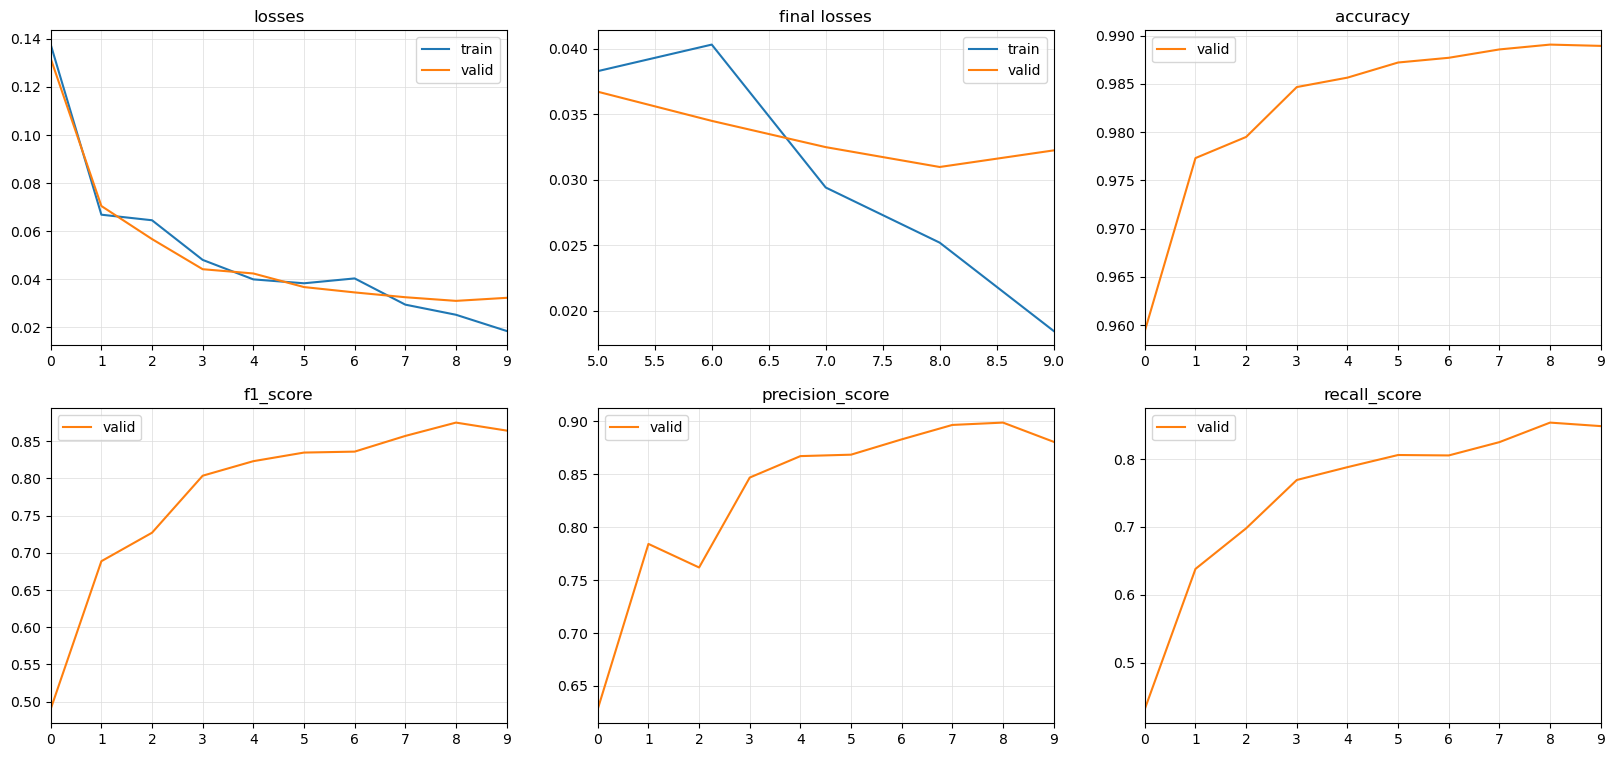

In [ ]:
learn11_turn = RunTSAI.multiclass_classification(X, y11_turn, split_all, config, save_path = "models/V2X_11/turn")

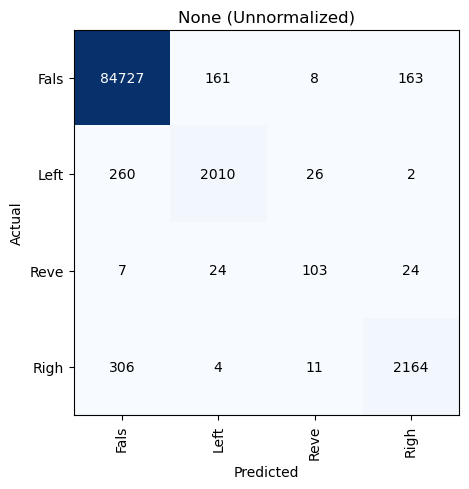

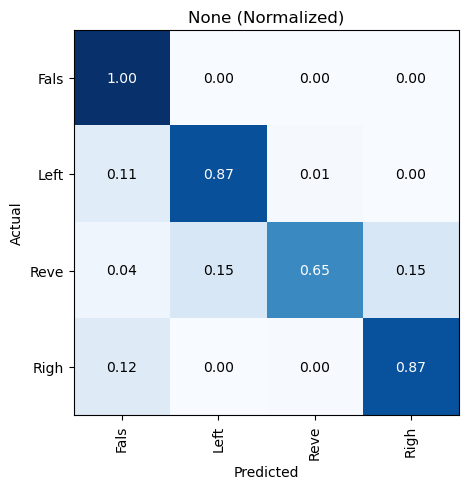

In [ ]:
RunTSAI.plot_confusion_matrix(learn11_turn)

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.002252,0.012256,0.998767,0.384337,0.573718,0.363204,01:57
1,0.002384,0.006122,0.999111,0.642713,0.796470,0.588747,01:51
2,0.004392,0.032565,0.999178,0.748893,0.797049,0.711286,01:33
3,0.004972,0.010975,0.999267,0.728290,0.820984,0.685912,01:53
4,0.003532,0.011128,0.999222,0.751500,0.726210,0.780414,01:44
5,0.003569,0.003817,0.999422,0.809387,0.882735,0.756376,01:54
6,0.002269,0.019241,0.999322,0.785036,0.770292,0.812948,01:50
7,0.001699,0.013693,0.999244,0.710654,0.818244,0.665002,01:54
8,0.000551,0.015756,0.999411,0.779685,0.798725,0.769874,01:47
9,0.000301,0.012279,0.999267,0.719914,0.815608,0.674011,01:46


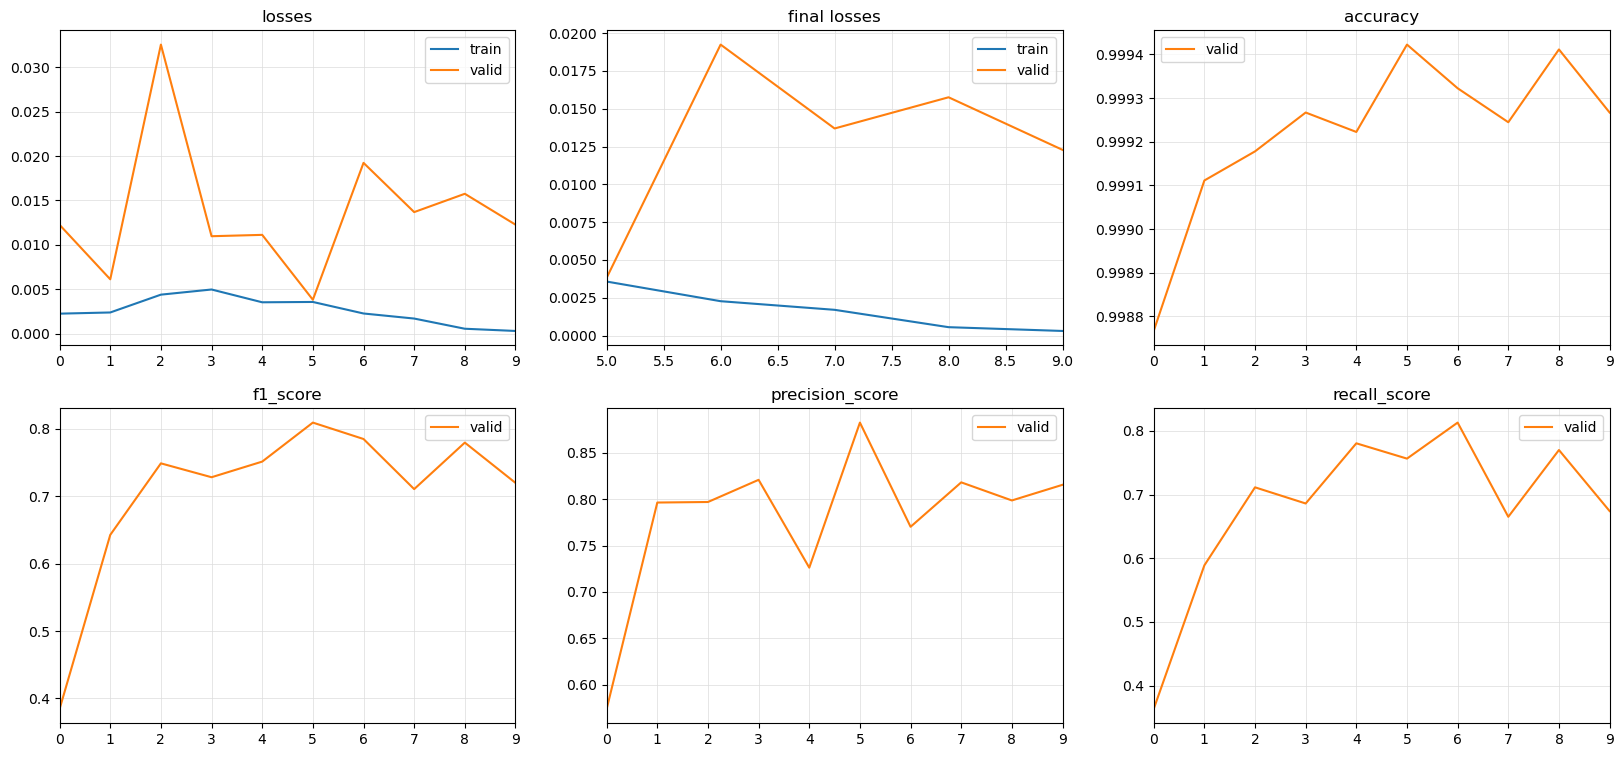

In [ ]:
learn11_speed = RunTSAI.multiclass_classification(X, y11_speed, split_all, config, save_path = "models/V2X_11/speed")

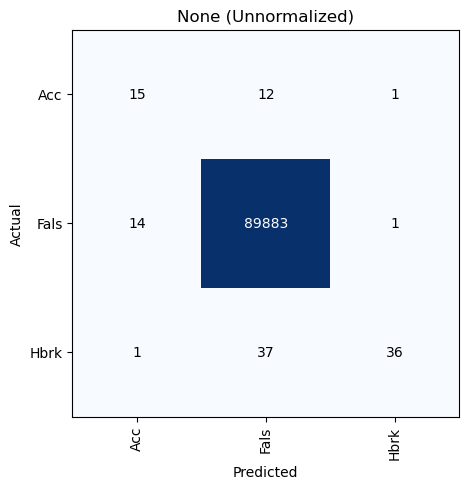

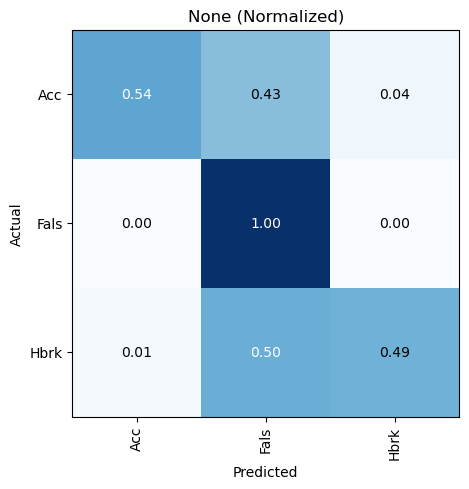

In [ ]:
RunTSAI.plot_confusion_matrix(learn11_speed)